<a href="https://colab.research.google.com/github/HjaijMohamed/Machine-Learning-/blob/main/Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction: 
##### Mobile Price Classifiation: Suppervised Problem  

##### Steps: 

   ##### 1. Importing the necessary libraries:
   ##### 2. Reading the Train and Test Data: (Source:Kaggle)


# I.Importing the necessary libraries:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# II. Reading the Train and Test Data: 

In [10]:
train_df=pd.read_csv('/train.csv')
test_df=pd.read_csv('/test.csv')

In [11]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# III. Exploratory Data Analysis:

 Exploratory data analysis (EDA) is a powerful and simple tool that can be used to improve your understanding of your data, by exploring its properties. The technique is often applied when the goal is to create new hypotheses or find patterns in the data. It’s often used on large amounts of qualitative or quantitative data that haven’t been analyzed before.

## 1.General info:

In [12]:
print(f'The number of rows is    :',train_df.shape[0])
print(f'The number of columns is :',train_df.shape[1])

The number of rows is    : 2000
The number of columns is : 21


([<matplotlib.patches.Wedge at 0x7fe17b1a05d0>,
 [Text(0.7778174593052024, 0.7778174593052023, '1'),
  Text(-0.7778174593052023, 0.7778174593052024, '2'),
  Text(-0.7778174593052025, -0.7778174593052023, '3'),
  Text(0.7778174593052022, -0.7778174593052025, '0')],
 [Text(0.4242640687119285, 0.42426406871192845, '25.0%'),
  Text(-0.42426406871192845, 0.4242640687119285, '25.0%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%')])

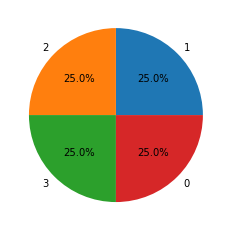

In [13]:
plt.pie(train_df['price_range'].value_counts(),labels=train_df['price_range'].unique(),autopct='%1.1f%%')

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Observation1 (info()): 
##### All the features are numerical.(No Categorical Features).So we don't need the encoding step.

In [15]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### Observation2 (Describe()): 
##### It looks like we don't have outliers and null values.   
##### Because : count=train_df.shape[0]=2000   
##### But let's go deeper into this dataset and check out. 

## 2.Check Null values with graphs:

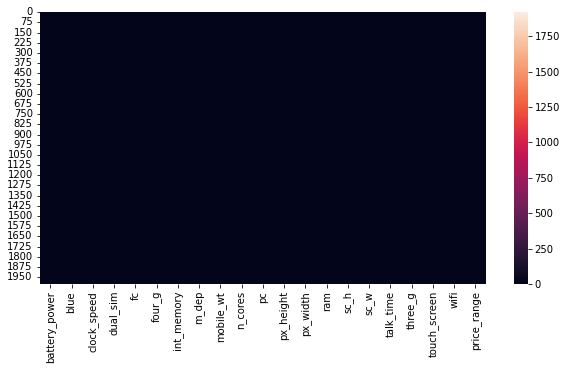

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(train_df.isna(),vmax=1920)

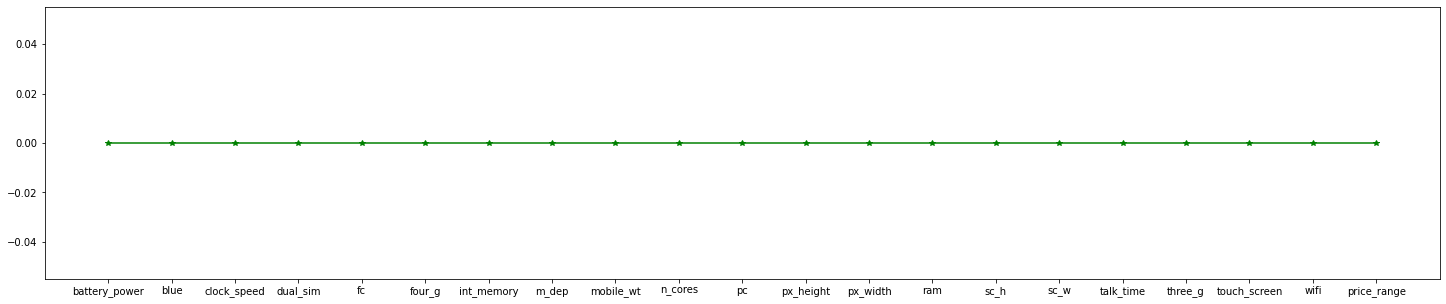

In [17]:
plt.figure(figsize=(25,5))
plt.plot(train_df.isna().sum(),marker='*',c='green')

#### Observation2.1(isna()):
##### We don't have null values.

## 3.Skewed data:

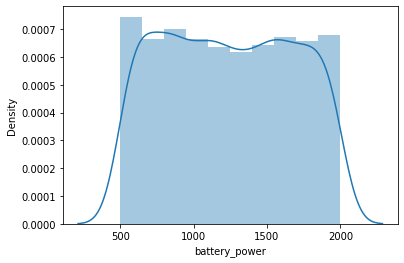

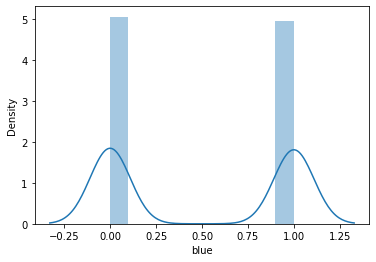

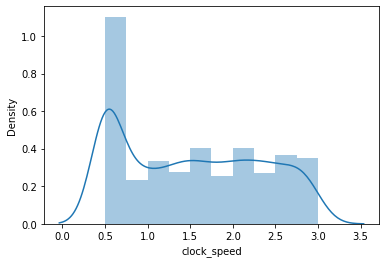

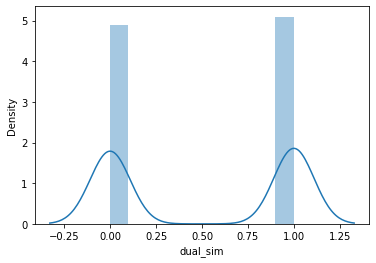

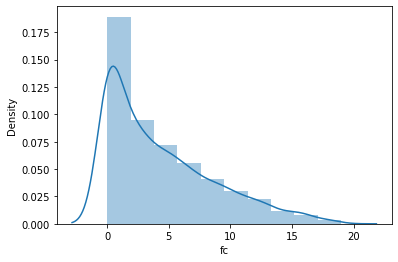

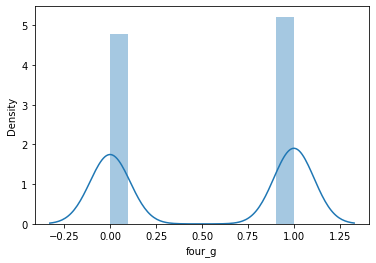

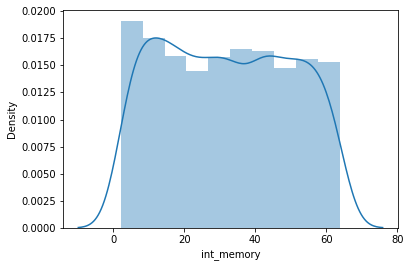

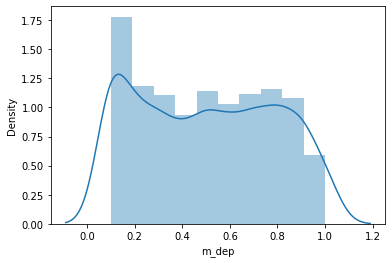

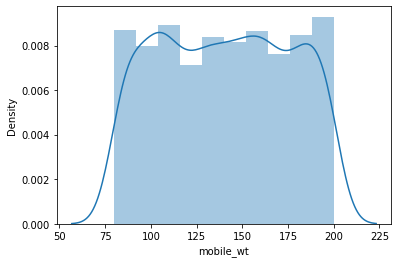

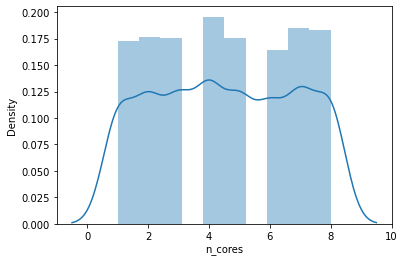

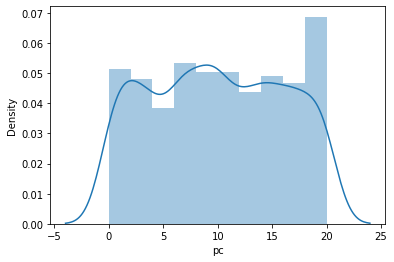

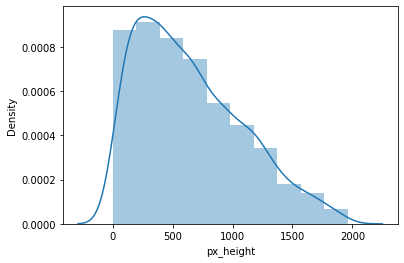

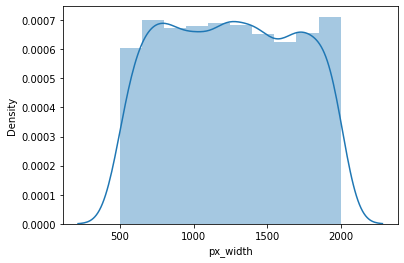

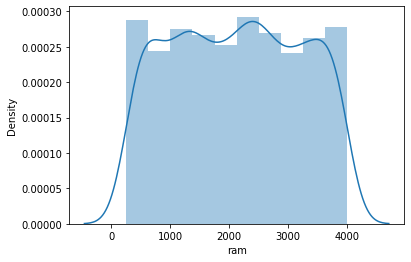

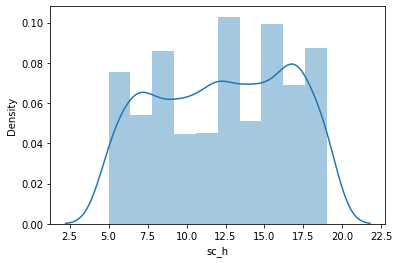

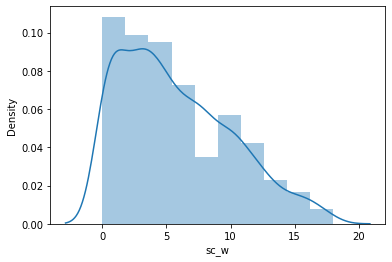

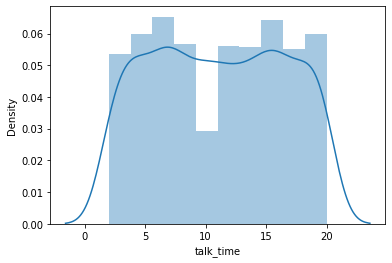

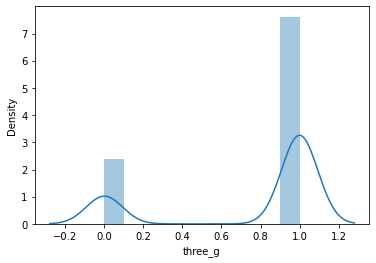

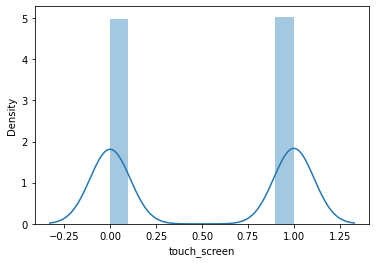

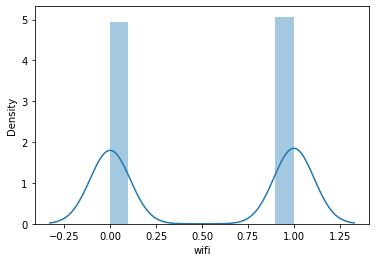

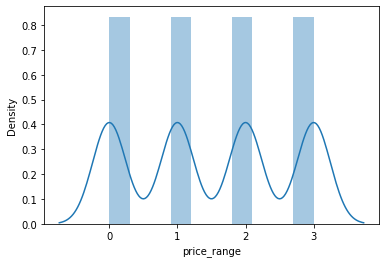

In [18]:
for col in train_df.columns:
    plt.figure()
    sns.distplot(train_df[col],bins=10)

#### observation 3:
   ##### columns with positive skew='fc','px_height','sc_w'

# 4.Outliers: 

### standard deviation:

In [19]:
#standard deviation
def check_outliers_with_std(train_df):
    print('end checking..')
    for col in train_df.columns:
        std=train_df[col].std()
        mean=train_df[col].mean()

        outliers_with_std=train_df[(train_df[col]<mean-3*std) | (train_df[col]>mean+3*std)][col]
        if(outliers_with_std.shape[0]>0):
            print('With standard deviation we have :{} outliers'.format(outliers_with_std.shape[0]))
            plt.figure(figsize=(15,3))
            sns.countplot(outliers_with_std,hue=train_df['price_range'])
            plt.figure(figsize=(15,3))
            sns.countplot(train_df[col],hue=train_df['price_range'])
            print(outliers_with_std.index)
    print('end checking..')

end checking..
With standard deviation we have :12 outliers
Int64Index([95, 226, 305, 1387, 1406, 1416, 1554, 1693, 1705, 1880, 1882,
            1888],
           dtype='int64')
end checking..


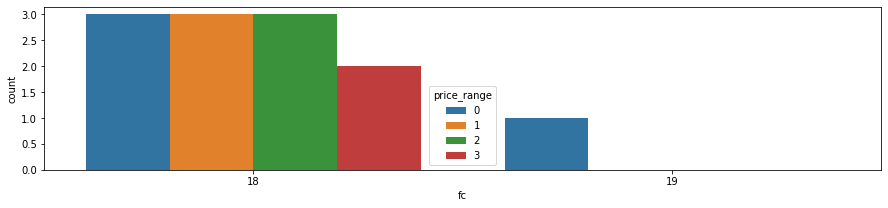

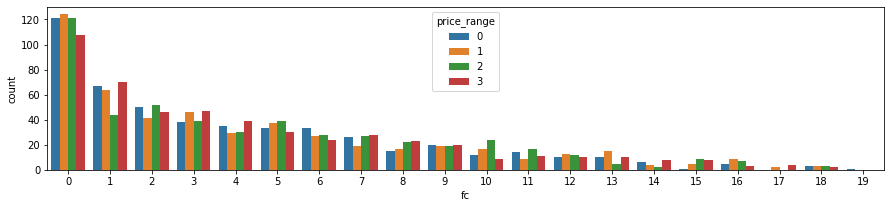

In [20]:
check_outliers_with_std(train_df)

### Z_SCORE:

####  -3  <  Z_SCORE  < +3

In [21]:
#z_score:
def check_outliers_with_z_index(train_df,rang):
    print('checking..')
    for col in train_df.columns:
        std=train_df[col].std()
        mean=train_df[col].mean()

        outliers_with_z_score=train_df[((train_df[col]-mean)/std <-abs(rang)) | ((train_df[col]-mean)/std >abs(rang))][col]
        if(outliers_with_z_score.shape[0]>0):
            print('In col [{}]: we have :{} outliers with z_score '.format(col,outliers_with_z_score.shape[0]))
            plt.figure(figsize=(15,3))
            sns.countplot(outliers_with_z_score,hue=train_df['price_range'])
            plt.figure(figsize=(15,3))
            sns.countplot(train_df[col])
    print('end checking..')

checking..
In col [fc]: we have :12 outliers with z_score 
end checking..


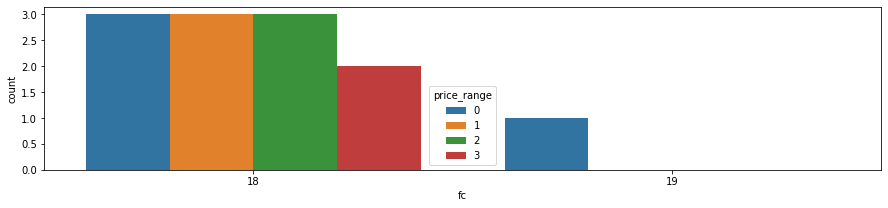

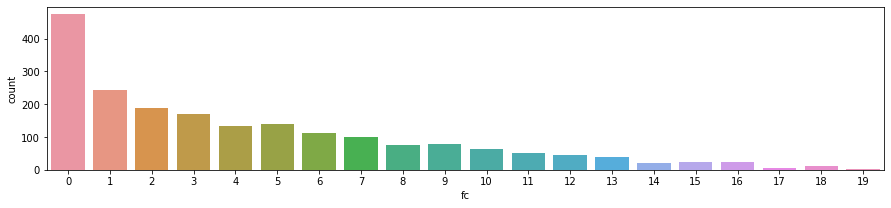

In [22]:
check_outliers_with_z_index(train_df,3)

#### Observation 4.1:
   ##### z_score and standard_deviation give us the same number of outliers :12
   ##### but,are they the same lines?

In [23]:
standard_deviation_index=[95,226, 305, 1387, 1406, 1416, 1554, 1693, 1705, 1880, 1882,1888]
z_score=[95, 226, 305, 1387, 1406, 1416, 1554, 1693, 1705, 1880,1882,1888]
standard_deviation_index==z_score

True

####  -2  <  Z_SCORE  < +2

checking..
In col [fc]: we have :125 outliers with z_score 
In col [px_height]: we have :89 outliers with z_score 
In col [sc_w]: we have :87 outliers with z_score 
end checking..


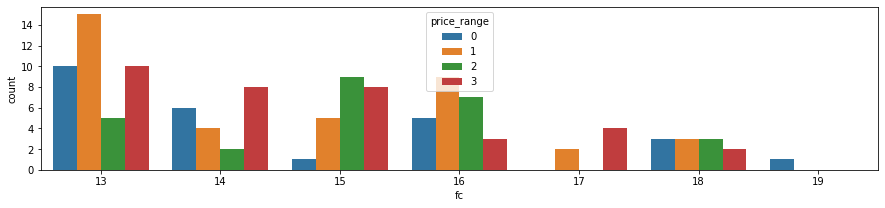

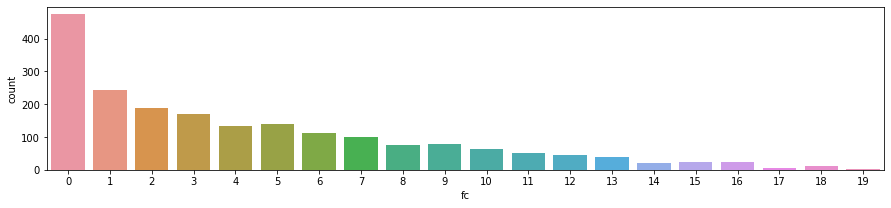

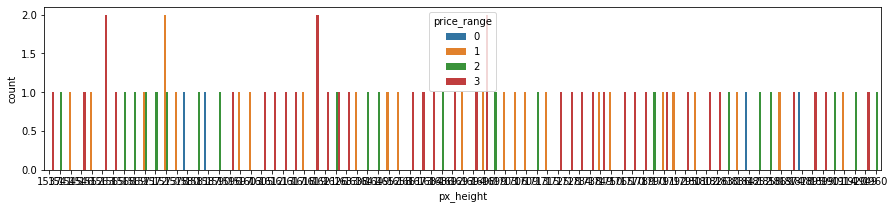

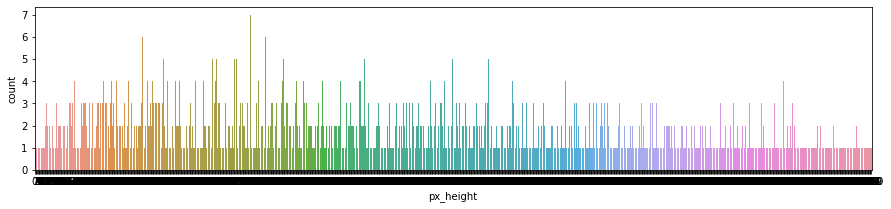

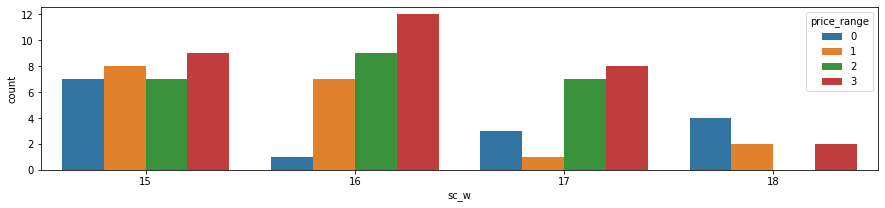

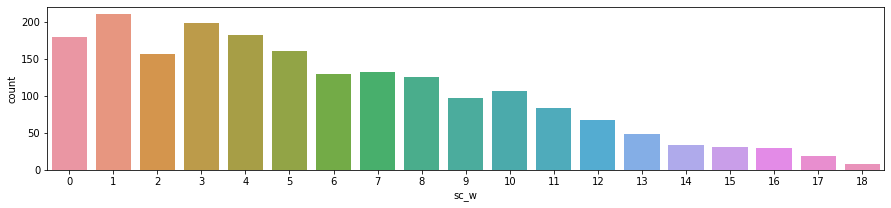

In [24]:
check_outliers_with_z_index(train_df,2)

#### Observation 4.2:with  -2 <z_score <2
   ##### we see that :the columns which have outliers are the  same columns with positive skew.

### IQR =Q3 - Q1

In [25]:
def check_outliers_with_IQR(train_df):
    print('checking..')
    for col in train_df.columns:
        Q1=train_df[col].quantile(0.25)
        Q3=train_df[col].quantile(0.75)
        IQR=Q3-Q1
        outliers_with_IQR=train_df[((train_df[col]<(Q1-1.5*IQR)) | (train_df[col]>(Q3 + 1.5*IQR)))][col]
        if (outliers_with_IQR.shape[0]>0):
            print('In col [{}]: we have :{} outliers with IQR'.format(col,outliers_with_IQR.shape[0]))
            print('index are:',list(outliers_with_IQR.index),'\n')
            plt.figure(figsize=(15,3))
            sns.countplot(outliers_with_IQR,hue=train_df['price_range'])
            plt.figure(figsize=(15,3))
            sns.countplot(train_df[col])
    print('end checking..')

checking..
In col [fc]: we have :18 outliers with IQR
index are: [95, 169, 226, 229, 300, 305, 372, 584, 1387, 1406, 1416, 1549, 1554, 1693, 1705, 1880, 1882, 1888] 

In col [px_height]: we have :2 outliers with IQR
index are: [988, 1771] 

In col [three_g]: we have :477 outliers with IQR
index are: [0, 10, 19, 22, 30, 45, 49, 51, 54, 58, 67, 74, 77, 79, 82, 85, 86, 94, 98, 106, 111, 118, 120, 122, 125, 134, 135, 139, 146, 148, 151, 154, 158, 159, 176, 179, 182, 207, 212, 219, 222, 224, 227, 229, 230, 231, 246, 250, 251, 254, 263, 269, 279, 286, 289, 290, 291, 296, 298, 301, 303, 307, 308, 310, 311, 314, 322, 325, 326, 327, 328, 329, 330, 334, 335, 343, 344, 349, 351, 352, 356, 360, 362, 364, 370, 373, 378, 380, 387, 390, 391, 392, 406, 412, 413, 416, 423, 424, 431, 439, 440, 442, 443, 445, 449, 456, 463, 469, 470, 471, 474, 477, 478, 482, 488, 493, 496, 500, 505, 507, 508, 511, 515, 518, 523, 537, 539, 547, 550, 555, 558, 560, 561, 563, 564, 565, 567, 568, 577, 584, 588, 589, 590, 592

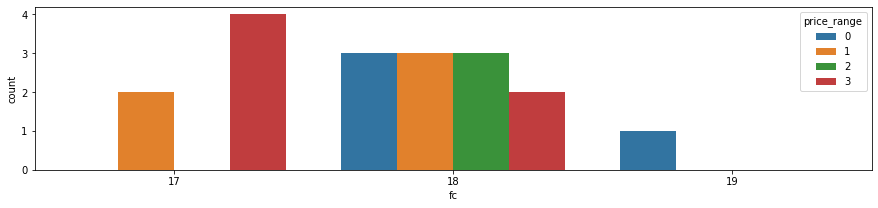

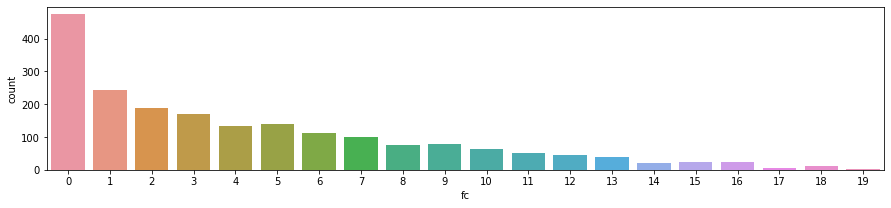

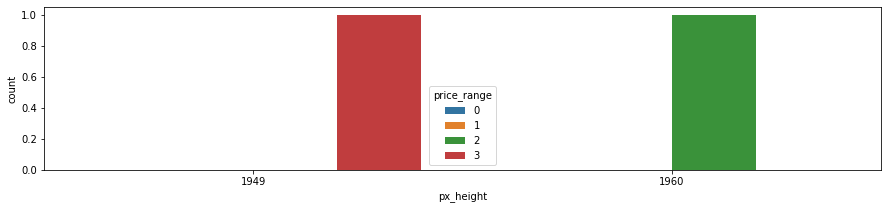

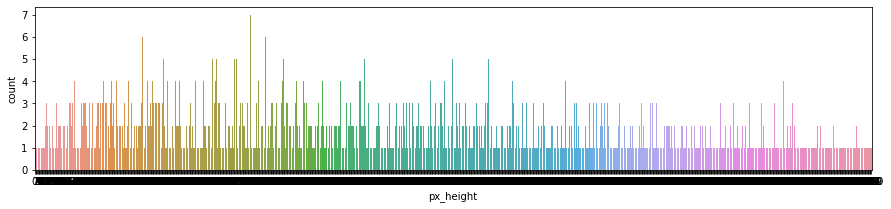

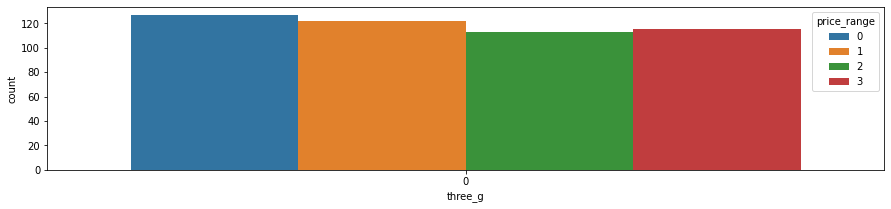

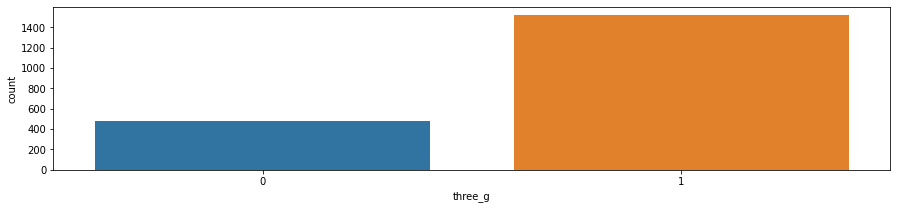

In [26]:
check_outliers_with_IQR(train_df)

In [27]:
print(((477+2+18)/train_df.shape[0])*100,'%')

24.85 %


#### Observation 4.3:
   ##### -We have more lines with Outliers with IQR.
   ##### -It shows new column with Outliers:  'three_g' .
   ##### -25% of data was concidered as Outliers with IQR.

## 5.Correlation:

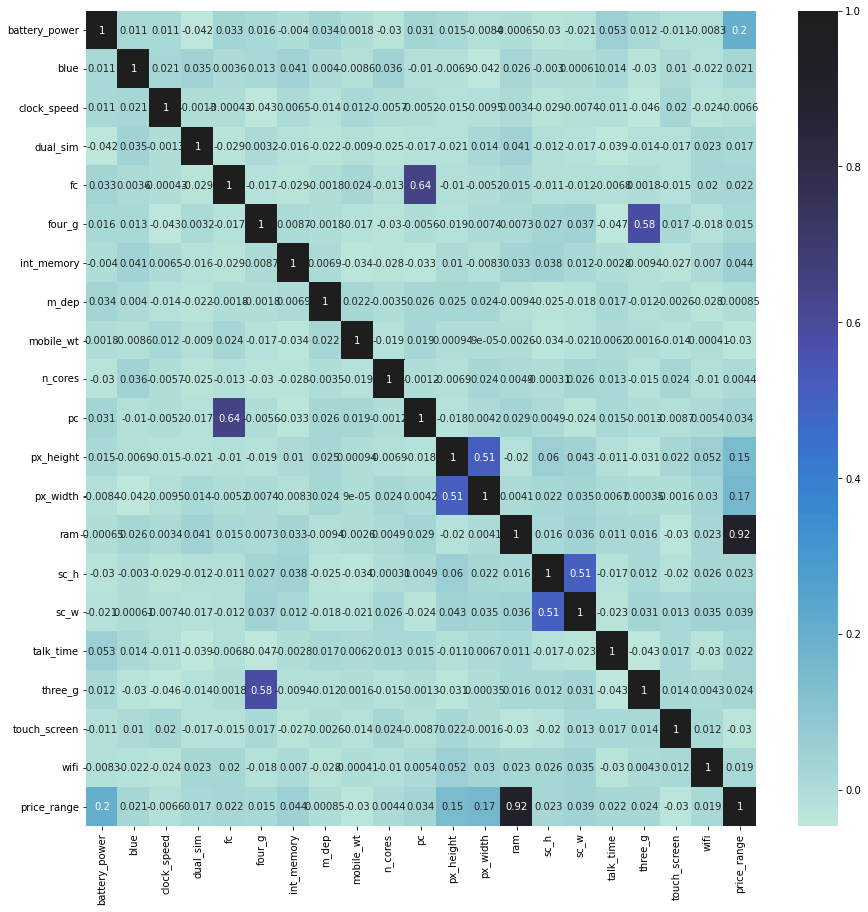

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(train_df.corr(),annot=True,center=1)

#### Observation 5.1:
##### -we have a high correlation between 'px_width' and 'px_height'
##### -we have a high correlation between 'sc_h' and 'sc_w'
##### -we have a high correlation between 'three_g' and 'four_g'
##### -we have a high correlation between 'pc' and 'fc'

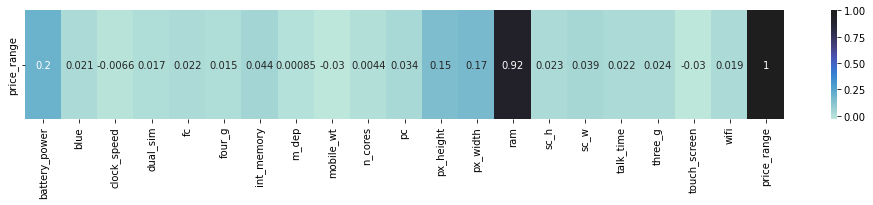

In [29]:
plt.figure(figsize=(17,2))
sns.heatmap(train_df.corr()[-1:],annot=True,center=1)

#### Obbservation 5.2:
##### -we have a high correlation between target feature 'price_range' and train features ('ram', 'battery_power', 'px_width', 'px_height' )

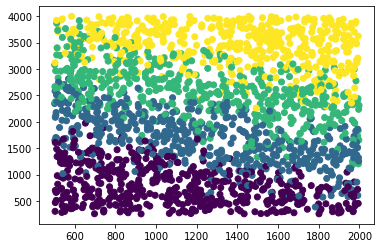

In [30]:
plt.scatter(train_df['battery_power'],train_df['ram'],c=train_df['price_range'])

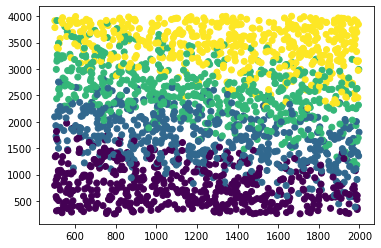

In [31]:
plt.scatter(train_df['px_width'],train_df['ram'],c=train_df['price_range'])

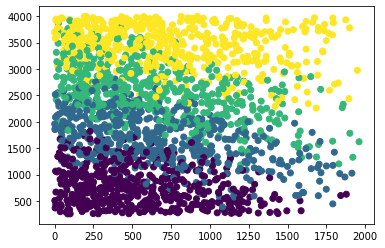

In [32]:
plt.scatter(train_df['px_height'],train_df['ram'],c=train_df['price_range'])

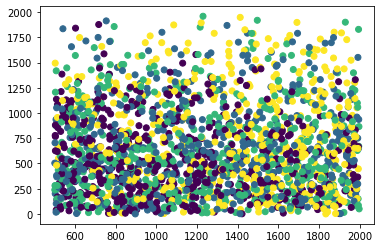

In [33]:
plt.scatter(train_df['battery_power'],train_df['px_height'],c=train_df['price_range'])

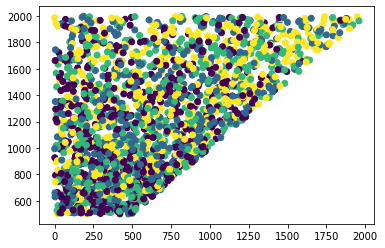

In [34]:
plt.scatter(train_df['px_height'],train_df['px_width'],c=train_df['price_range'])

#### Observation 5.3:
##### -It's clear that 'ram' is the most important feature.

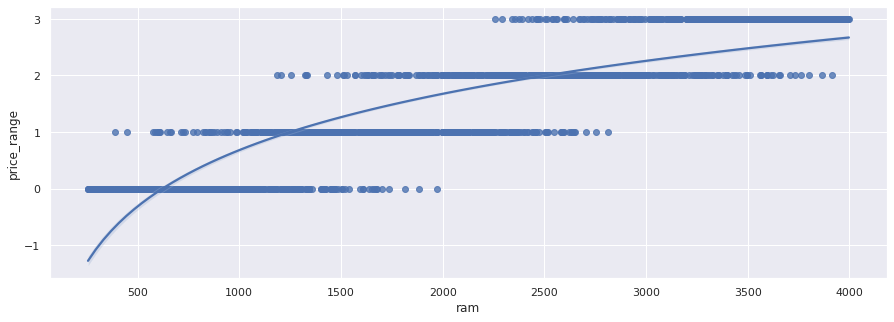

In [35]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(15,5))
sns.regplot(train_df['ram'],y=train_df['price_range'],logx=True)

# IV.Fast Train :Before Feature engineering

## Spliting:

In [36]:
x=train_df.drop('price_range',axis=1)
y=train_df['price_range']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1738,511,0,0.9,1,15,1,24,0.6,136,3,18,367,1264,2378,18,3,4,1,0,0
548,641,1,1.1,0,0,1,7,0.9,192,1,3,417,759,3595,7,5,19,1,1,1
936,805,0,0.8,0,1,0,34,0.6,88,6,2,1262,1538,3647,18,11,9,1,0,1
1389,1801,0,0.5,1,6,0,52,0.9,120,6,10,100,1708,258,14,8,9,1,0,0
1607,744,0,1.7,1,0,1,33,0.5,105,4,2,1252,1963,2700,9,3,19,1,0,0


## Training + Evaluation(Recall,Precision,f1-score)

In [39]:
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
sgdc=SGDClassifier()
svc=SVC()
rfc=RandomForestClassifier()

models={'knn':knn,'dt':dt,'sgdc':sgdc,'svc':svc,'rfc':rfc}

train_results=[]
val_results=[]
for name,model in models.items():
    model.fit(x_train,y_train)
    train_score=model.score(x_train,y_train)
    val_score=model.score(x_val,y_val)
    print('model :{} train f1-score: {} val_score: {}'.format(name,train_score,val_score))
    train_results.append(train_score)
    val_results.append(val_score)

model :knn train f1-score: 0.956 val_score: 0.932
model :dt train f1-score: 1.0 val_score: 0.816
model :sgdc train f1-score: 0.45066666666666666 val_score: 0.418
model :svc train f1-score: 0.9553333333333334 val_score: 0.952
model :rfc train f1-score: 1.0 val_score: 0.874


#### Observation 6.1:
##### we have underfitting with 'sgdc' model.
##### we have overfitting with 'DecisionTreeClassifier' and 'RandomForestClassifier' models

In [40]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print(classification_report(y_train,knn.predict(x_train)))
print(classification_report(y_val,knn.predict(x_val)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       368
           1       0.93      0.96      0.95       382
           2       0.94      0.94      0.94       380
           3       0.98      0.95      0.97       370

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       132
           1       0.89      0.93      0.91       118
           2       0.92      0.89      0.91       120
           3       0.96      0.95      0.95       130

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



In [41]:
svc=SVC()
svc.fit(x_train,y_train)
print(classification_report(y_train,svc.predict(x_train)))
print(classification_report(y_val,svc.predict(x_val)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       368
           1       0.93      0.95      0.94       382
           2       0.95      0.91      0.93       380
           3       0.97      0.97      0.97       370

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       132
           1       0.92      0.97      0.95       118
           2       0.95      0.91      0.93       120
           3       0.96      0.95      0.96       130

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



#### Observation 6.2:
##### we have perfect results with 'knn' and 'svc' models without feature engineering.But we will try to  improve the model

# V.Feature Engineering:

## 1.Handling Outliers (IQR):  'Replacing the outliers by IQR'

In [42]:
def IQR_Imputation(train_df):
    df=train_df.copy()
    for col in df.columns:
        mean=df[col].mean()
        std=df[col].std()
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        outliers=df[((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3 + 1.5*IQR)))][col]
        print('col: {} number of outliers is: {}'.format(col,outliers.shape[0]))
        print(list(outliers.index))
        df[col][list(outliers.index)]=df[col].mode()[0]
    return df

In [43]:
df_no_outliers=IQR_Imputation(train_df)
df_no_outliers.shape

col: battery_power number of outliers is: 0
[]
col: blue number of outliers is: 0
[]
col: clock_speed number of outliers is: 0
[]
col: dual_sim number of outliers is: 0
[]
col: fc number of outliers is: 18
[95, 169, 226, 229, 300, 305, 372, 584, 1387, 1406, 1416, 1549, 1554, 1693, 1705, 1880, 1882, 1888]
col: four_g number of outliers is: 0
[]
col: int_memory number of outliers is: 0
[]
col: m_dep number of outliers is: 0
[]
col: mobile_wt number of outliers is: 0
[]
col: n_cores number of outliers is: 0
[]
col: pc number of outliers is: 0
[]
col: px_height number of outliers is: 2
[988, 1771]
col: px_width number of outliers is: 0
[]
col: ram number of outliers is: 0
[]
col: sc_h number of outliers is: 0
[]
col: sc_w number of outliers is: 0
[]
col: talk_time number of outliers is: 0
[]
col: three_g number of outliers is: 477
[0, 10, 19, 22, 30, 45, 49, 51, 54, 58, 67, 74, 77, 79, 82, 85, 86, 94, 98, 106, 111, 118, 120, 122, 125, 134, 135, 139, 146, 148, 151, 154, 158, 159, 176, 179, 

(2000, 21)

In [44]:
check_outliers_with_IQR(df_no_outliers)

checking..
end checking..


In [45]:
df_no_outliers.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,1,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1




```
# Ce texte est au format code
```

## 2.Scaling:MinMaxScaling df_no_outliers +test_df

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
sc=MinMaxScaler()
df_no_outliers[df_no_outliers.drop(['price_range'],axis=1).columns]=sc.fit_transform(df_no_outliers.drop(['price_range'],axis=1))

In [48]:
df_no_outliers.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.0625,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010417,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.0000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.471354,0.993324,0.634687,0.857143,0.166667,0.277778,0.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.1250,1.0,0.629032,0.888889,0.541667,0.571429,...,0.657813,0.811749,0.627205,0.428571,0.111111,0.388889,0.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.0000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.633333,0.858478,0.671566,0.785714,0.444444,0.500000,0.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.8125,1.0,0.677419,0.555556,0.508333,0.142857,...,0.629167,0.475300,0.308658,0.214286,0.111111,0.722222,0.0,1.0,0.0,1


In [49]:
test_df=test_df.drop('id',axis=1)

In [50]:
test_df[test_df.columns]=sc.transform(test_df)

## 3. x and y:  

In [51]:
x2=df_no_outliers.drop(['price_range'],axis=1)
y2=df_no_outliers['price_range']

In [52]:
y2.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [53]:
x2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.0625,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010417,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.0000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.471354,0.993324,0.634687,0.857143,0.166667,0.277778,0.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.1250,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.657813,0.811749,0.627205,0.428571,0.111111,0.388889,0.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.0000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.633333,0.858478,0.671566,0.785714,0.444444,0.500000,0.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.8125,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.629167,0.475300,0.308658,0.214286,0.111111,0.722222,0.0,1.0,0.0


## 4.Feature_selection1:SelectKBest

In [54]:
from sklearn.feature_selection import chi2,SelectKBest

In [55]:
KBest_selector=SelectKBest(chi2,k=10)

In [56]:
x_Kbest=KBest_selector.fit_transform(x2,y2)
KBest_selector.get_support()

array([ True, False, False, False, False,  True,  True, False,  True,
        True, False,  True,  True,  True,  True, False, False, False,
        True, False])

In [57]:
x_Kbest=x2[x2.columns[KBest_selector.get_support()]]
x_Kbest.head()

,battery_power,four_g,int_memory,mobile_wt,n_cores,px_height,px_width,ram,sc_h,touch_screen
0,0.227789,0.0,0.080645,0.900000,0.142857,0.010417,0.170895,0.612774,0.285714,0.0
1,0.347361,1.0,0.822581,0.466667,0.285714,0.471354,0.993324,0.634687,0.857143,1.0
2,0.041416,1.0,0.629032,0.541667,0.571429,0.657813,0.811749,0.627205,0.428571,1.0
3,0.076152,0.0,0.129032,0.425000,0.714286,0.633333,0.858478,0.671566,0.785714,0.0
4,0.881764,1.0,0.677419,0.508333,0.142857,0.629167,0.475300,0.308658,0.214286,1.0


### 4.1Training

In [58]:
x_kbest_train,x_kbest_val,y_kbest_train ,y_kbest_val=train_test_split(x_Kbest,y2,test_size=0.25,random_state=42)
knn2=KNeighborsClassifier()
dt2=DecisionTreeClassifier()
sgdc2=SGDClassifier()
svc2=SVC()
rfc2=RandomForestClassifier()

models2={'knn':knn2,'dt':dt2,'sgdc':sgdc2,'svc':svc2,'rfc':rfc2}
train_results2=[]
val_results2=[]
for name,model in models2.items():
    model.fit(x_kbest_train,y_kbest_train)
    train_score=model.score(x_kbest_train,y_kbest_train)
    val_score=model.score(x_kbest_val,y_kbest_val)
    print('model :{} train f1-score: {} val_score: {}'.format(name,train_score,val_score))
    train_results2.append(train_score)
    val_results2.append(val_score)

model :knn train f1-score: 0.7693333333333333 val_score: 0.648
model :dt train f1-score: 1.0 val_score: 0.838
model :sgdc train f1-score: 0.73 val_score: 0.746
model :svc train f1-score: 0.9573333333333334 val_score: 0.916
model :rfc train f1-score: 1.0 val_score: 0.918


### 4.2 Evaluation

Text(0.5, 1.0, 'First and Second Traning results')

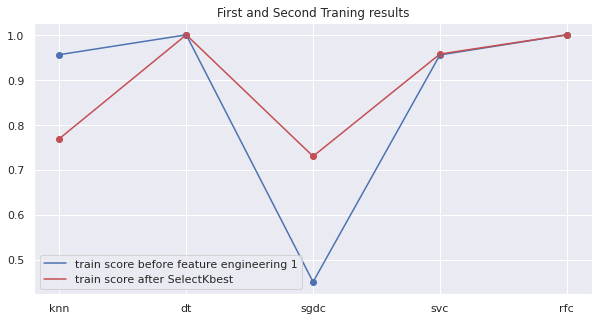

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(x=models.keys(),y=train_results,c='b',)
plt.plot(train_results,c='b',label='train score before feature engineering 1')
plt.scatter(x=models.keys(),y=train_results2,c='r')
plt.plot(train_results2,c='r',label='train score after SelectKbest')
plt.legend()
plt.title('First and Second Traning results')

Text(0.5, 1.0, 'First and Second validation results')

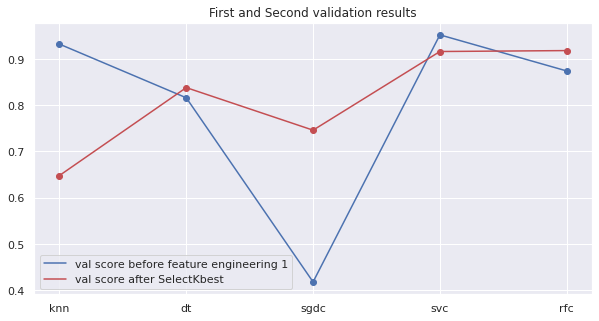

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(x=models.keys(),y=val_results,c='b',)
plt.plot(val_results,c='b',label='val score before feature engineering 1')
plt.scatter(x=models.keys(),y=val_results2,c='r')
plt.plot(val_results2,c='r',label='val score after SelectKbest')
plt.legend()
plt.title('First and Second validation results')

#### Observation :
##### we have one improvement in train score of sgdc model with ~0.2 .
##### in general we have an imporvement in validation scores of all models except knn.

## 5.Feature slecetion 2:SelectFromModel:
##### Meta-transformer for selecting features based on importance weights.

In [61]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score,StratifiedKFold

 
 
   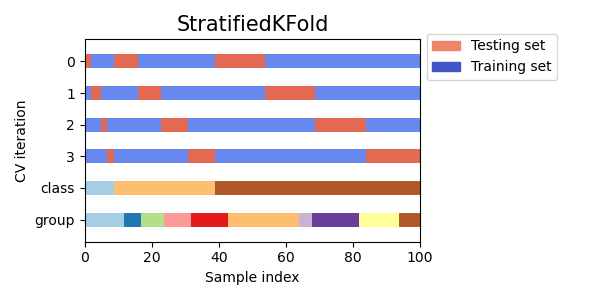
####StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

### 5.1 DecisionTreeClassifier:

In [62]:
sfm=SelectFromModel(DecisionTreeClassifier())
sfm.fit_transform(x2,y2)
best_features=sfm.get_feature_names_out()
x_dt_sfm=x2[best_features]
x_dt_sfm.head()

,battery_power,px_height,px_width,ram
0,0.227789,0.010417,0.170895,0.612774
1,0.347361,0.471354,0.993324,0.634687
2,0.041416,0.657813,0.811749,0.627205
3,0.076152,0.633333,0.858478,0.671566
4,0.881764,0.629167,0.475300,0.308658


In [63]:
dt_sfm=DecisionTreeClassifier()
cv=StratifiedKFold(4)
cross_val_score(dt_sfm,x_dt_sfm,y2,cv=cv).mean()

0.864

#### Observation:
##### we have no improvement with DecisionTreeClassifier()

### 5.2 SGDClassifier:

In [64]:
sfm=SelectFromModel(SGDClassifier())
sfm.fit_transform(x2,y2)
best_features=sfm.get_feature_names_out()
x_sgdc_sfm=x2[best_features]
x_sgdc_sfm.head()

,battery_power,px_height,px_width,ram
0,0.227789,0.010417,0.170895,0.612774
1,0.347361,0.471354,0.993324,0.634687
2,0.041416,0.657813,0.811749,0.627205
3,0.076152,0.633333,0.858478,0.671566
4,0.881764,0.629167,0.475300,0.308658


In [65]:
sgdc_sfm=SGDClassifier()
cv=StratifiedKFold(4)
cross_val_score(sgdc_sfm,x_sgdc_sfm,y2,cv=cv).mean()

0.7310000000000001

#### Observation:
##### -We have no improvement with SGDClassifier().
##### -Now we will continue the training with the same best  features for KNN and SVC and RandomForestClassifier.

### 5.3 KNeighborsClassifier :(with best features)

In [66]:
knn_sfm=KNeighborsClassifier()
cv=StratifiedKFold(4)
cross_val_score(knn_sfm,x_sgdc_sfm,y2,cv=cv).mean()

0.8945000000000001

### 5.4 RandomForestClassifier :(with best features)

In [67]:
rfc_sfm=RandomForestClassifier()
cv=StratifiedKFold(4)
cross_val_score(rfc_sfm,x_sgdc_sfm,y2,cv=cv).mean()

0.9175

### 5.5 SVC :(with best features)

In [68]:
svc_sfm=SVC()
cv=StratifiedKFold(4)
cross_val_score(svc_sfm,x_sgdc_sfm,y2,cv=cv).mean()

0.9474999999999999

### 5.6 Resume : (All models with best features)

#### Training + validation:

In [69]:
x_sfm=x2[best_features]
knn_sfm=KNeighborsClassifier()
dt_sfm=DecisionTreeClassifier()
sgdc_sfm=SGDClassifier()
svc_sfm=SVC()
rfc_sfm=RandomForestClassifier()

models_sfm={'knn':knn_sfm,'dt':dt_sfm,'sgdc':sgdc_sfm,'svc':svc_sfm,'rfc':rfc_sfm}
val_results_sfm=[]
cv=StratifiedKFold(4)
for name,model in models_sfm.items():
    val_score=cross_val_score(model,x_sfm,y2,cv=cv).mean()
    print('model :{} val_score: {}'.format(name,val_score))
    val_results_sfm.append(val_score)

model :knn val_score: 0.8945000000000001
model :dt val_score: 0.858
model :sgdc val_score: 0.738
model :svc val_score: 0.9474999999999999
model :rfc val_score: 0.913


#### Plot Resume:

Text(0.5, 1.0, 'First , SelectKBest and SFM validation results')

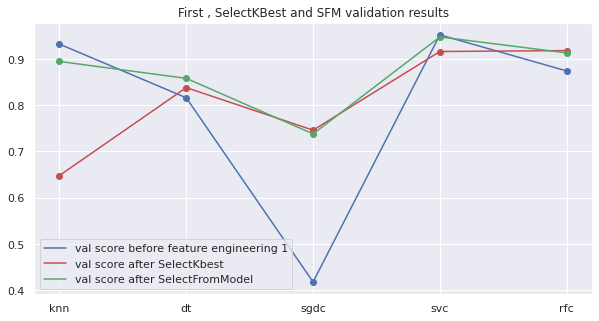

In [70]:
plt.figure(figsize=(10,5))
plt.scatter(x=models.keys(),y=val_results,c='b',)
plt.plot(val_results,c='b',label='val score before feature engineering 1')

plt.scatter(x=models.keys(),y=val_results2,c='r')
plt.plot(val_results2,c='r',label='val score after SelectKbest')

plt.scatter(x=models.keys(),y=val_results_sfm,c='g')
plt.plot(val_results_sfm,c='g',label='val score after SelectFromModel')

plt.legend()
plt.title('First , SelectKBest and SFM validation results')

#### Observation:
##### -After degriding the knn model in second train with 'SelectKbest' ,we had an intresting improvement with 'SelectFromModel'.
##### -To resume: our results looks like we got the best results from previous  trainings.And the best features are those which have best correlation with target feature. 
##### -what's next? After selection the best features ,next will try to choose the best params with 'RandomizedSearchCV'.

In [75]:
best_x=x_sgdc_sfm.copy()

# VI.Hyperparameter Tuning:

In [74]:
from sklearn.model_selection import RandomizedSearchCV

## 1.KNeighborsClassifier :

In [170]:
knn_hpt=KNeighborsClassifier()
knn_params={'n_neighbors':np.arange(5,50,1)}
knn_rscv=RandomizedSearchCV(estimator=knn_hpt,param_distributions=knn_params,
                            cv=StratifiedKFold(4),n_iter=100,verbose=1,random_state=42)
knn_rscv.fit(best_x,y2)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   random_state=42, verbose=1)

In [133]:
knn_rscv_best=knn_rscv.best_estimator_
knn_rscv_best

KNeighborsClassifier(n_neighbors=33)

In [134]:
knn_rscv.best_params_

{'n_neighbors': 33}

In [135]:
knn_rscv.best_score_

0.9125

In [125]:
rscv_val_scores=[]
rscv_val_scores.append(knn_rscv.best_score_)

## 2.DecisionTreeClassifier:

In [136]:
dt_hpt=DecisionTreeClassifier()
dt_params= {"max_depth": [3, None],
              "min_samples_leaf": np.arange(1,9,1),
              "criterion": ["gini", "entropy"]}
dt_rscv=RandomizedSearchCV(estimator=dt_hpt,param_distributions=dt_params,
                            cv=StratifiedKFold(4),n_iter=100,verbose=1,random_state=42)
dt_rscv.fit(best_x,y2)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8])},
                   random_state=42, verbose=1)

In [137]:
dt_rscv_best=dt_rscv.best_estimator_
dt_rscv_best

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)

In [138]:
dt_rscv.best_params_

{'min_samples_leaf': 3, 'max_depth': None, 'criterion': 'entropy'}

In [140]:
dt_rscv.best_score_

0.877

In [141]:
rscv_val_scores.append(dt_rscv.best_score_)

## 3.SGDClassifier:

In [145]:
sgdc_hpt=SGDClassifier()
sgdc_params= {'penalty' : ['l1', 'l2', 'elasticnet'] ,'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'eta0' : [1, 10, 100]}
sgdc_rscv=RandomizedSearchCV(estimator=sgdc_hpt,param_distributions=sgdc_params,n_iter=100,n_jobs=4,
                             cv=StratifiedKFold(4),verbose=1)
sgdc_rscv.fit(best_x,y2)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=SGDClassifier(), n_iter=100, n_jobs=4,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000],
                                        'eta0': [1, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   verbose=1)

In [146]:
sgdc_rscv.best_estimator_

SGDClassifier(eta0=100, penalty='l1')

In [147]:
sgdc_rscv.best_params_

{'penalty': 'l1', 'eta0': 100, 'alpha': 0.0001}

In [148]:
sgdc_rscv.best_score_

0.7995

In [149]:
rscv_val_scores.append(sgdc_rscv.best_score_)

## 4.SVC:

In [172]:

svc_params={
    "C": [ 0.1 ,1,10 ],
    "kernel": ['rbf', 'poly'],
    "gamma":[ 0.1,1 ,10 ]
    }
svc_rscv=RandomizedSearchCV(estimator=SVC(),param_distributions=svc_params,n_iter=100,n_jobs=4,verbose=1,
                            cv=StratifiedKFold(4))
svc_rscv.fit(best_x,y2)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=SVC(), n_iter=100, n_jobs=4,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [0.1, 1, 10],
                                        'kernel': ['rbf', 'poly']},
                   verbose=1)

In [152]:
svc_rscv.best_estimator_

SVC(C=10, gamma=1)

In [155]:
svc_rscv.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 10}

In [154]:
svc_rscv.best_score_ 

0.9535

In [156]:
svc_b=SVC(kernel='rbf', gamma=1,C=10)

In [157]:
cross_val_score(svc_b,best_x,y2,cv=StratifiedKFold(4)).mean()

0.9535

In [158]:
rscv_val_scores.append(svc_rscv.best_score_)

In [159]:
rscv_val_scores

[0.9125, 0.877, 0.7995, 0.9535]

## 5.RandomForestClassifier:

In [175]:
rfc_params={
'max_depth': [10, 20, 30, 40, 60, 70, 80, 100, None],
'n_estimators': [50,200,300, 400, 600]}
rfc_rscv=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=rfc_params,n_iter=100,n_jobs=4,verbose=5,
                            cv=StratifiedKFold(4))
rfc_rscv.fit(best_x,y2)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=4,
                   param_distributions={'max_depth': [10, 20, 30, 40, 60, 70,
                                                      80, 100, None],
                                        'n_estimators': [50, 200, 300, 400,
                                                         600]},
                   verbose=5)

In [176]:
rfc_rscv.best_estimator_

RandomForestClassifier(max_depth=70, n_estimators=200)

In [177]:
rfc_rscv.best_params_

{'n_estimators': 200, 'max_depth': 70}

In [178]:
rfc_rscv.best_score_

0.92

In [179]:
rscv_val_scores.append(rfc_rscv.best_score_)

## 6.Resume Hyperparameter Tuning: (Validation Results)

Text(0.5, 1.0, 'First , SelectKBest ,SFM and HypParameter Tuning validation results')

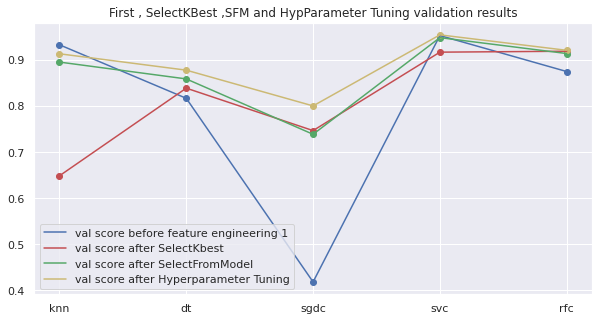

In [183]:
plt.figure(figsize=(10,5))
plt.scatter(x=models.keys(),y=val_results,c='b',)
plt.plot(val_results,c='b',label='val score before feature engineering 1')

plt.scatter(x=models.keys(),y=val_results2,c='r')
plt.plot(val_results2,c='r',label='val score after SelectKbest')

plt.scatter(x=models.keys(),y=val_results_sfm,c='g')
plt.plot(val_results_sfm,c='g',label='val score after SelectFromModel')

plt.scatter(x=models.keys(),y=rscv_val_scores,c='y')
plt.plot(rscv_val_scores,c='y',label='val score after Hyperparameter Tuning')

plt.legend()
plt.title('First , SelectKBest ,SFM and HypParameter Tuning validation results')

#### Observation (validation results):
##### -SVC is the best model for this problem.
##### -We have an improvement with Hyperparamater Tuning.
##### -SGDC is better then before.
##### *We have now the best features and the params.In next step we will try to boost our estimators.

# VII.Boosting:

##### Boosting is a technique that aims at combining multiple weak classifiers to build one strong *classifier* .

In [185]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import validation_curve 

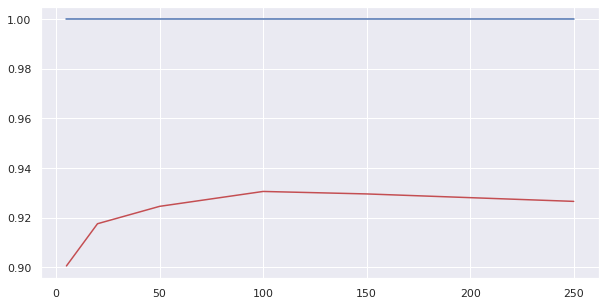

In [209]:
n_estimators=[5,20,50,100,150,250]
estimator=DecisionTreeClassifier(min_samples_leaf=3,max_depth=None,criterion='entropy')
ada=AdaBoostClassifier(estimator)
cv=StratifiedKFold(4)

train_score,val_score=validation_curve(estimator=ada,X=best_x,y=y2,param_name='n_estimators',param_range=n_estimators,cv=cv)
plt.figure(figsize=(10,5))
plt.plot(n_estimators,train_score.mean(axis=1))
plt.plot(n_estimators,val_score.mean(axis=1),c='r')

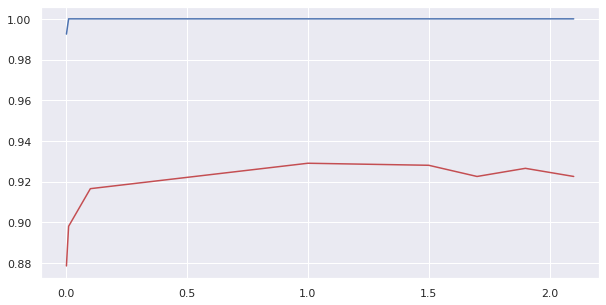

In [214]:
learning_rates=[0.001,0.01,0.1,1,1.5,1.7,1.9,2.1]
estimator=DecisionTreeClassifier(min_samples_leaf=3,max_depth=None,criterion='entropy')
ada=AdaBoostClassifier(estimator)
cv=StratifiedKFold(4)

train_score,val_score=validation_curve(estimator=ada,X=best_x,y=y2,param_name='learning_rate',param_range=learning_rates,cv=cv)
plt.figure(figsize=(10,5))
plt.plot(learning_rates,train_score.mean(axis=1))
plt.plot(learning_rates,val_score.mean(axis=1),c='r')

#### Observation :
##### -best learning rate for adaboostclassifier with decisionTreeClassifier as  estimator is 1 . 
##### -best n_estimators for adaboostclassifier decisionTreeClassifier as  estimator is 100 .

In [242]:
best_dt=DecisionTreeClassifier(min_samples_leaf=3,max_depth=None,criterion='entropy')
best_ada=AdaBoostClassifier(best_dt,n_estimators=100,learning_rate=1)
cross_val_score(best_ada,best_x,y2,cv=cv).mean()

0.93

# VIII. BAGGING:
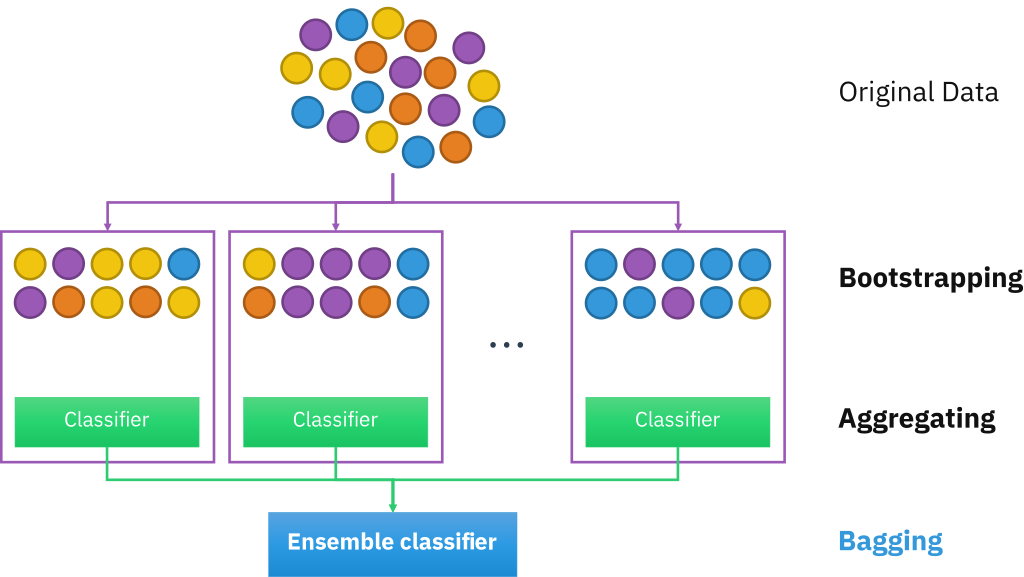

####How bagging works

##### ***-Bootstrapping***:  Bagging leverages a bootstrapping sampling technique to create diverse samples. This resampling method generates different subsets of the training dataset by selecting data points at random and with replacement. This means that each time you select a data point from the training dataset, you are able to select the same instance multiple times. As a result, a value/instance repeated twice (or more) in a sample.

##### ***-Parallel training***: These bootstrap samples are then trained independently and in parallel with each other using weak or base learners.

##### ***-Aggregation***: Finally, depending on the task (i.e. regression or classification), an average or a majority of the predictions are taken to compute a more accurate estimate. In the case of regression, an average is taken of all the outputs predicted by the individual classifiers; this is known as soft voting. For classification problems, the class with the highest majority of votes is accepted; this is known as hard voting or majority voting.

In [215]:
from sklearn.ensemble import BaggingClassifier

##1. Bagging with decisionTreeClassifier :

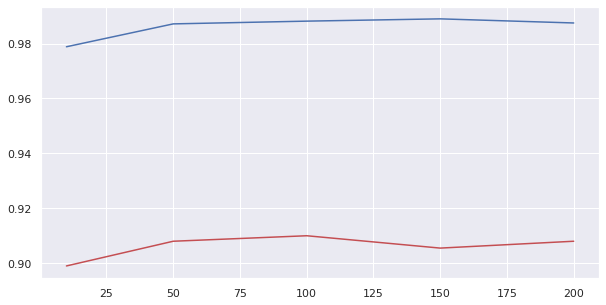

In [224]:
estimator=DecisionTreeClassifier(min_samples_leaf=3,max_depth=None,criterion='entropy')
bc=BaggingClassifier(estimator)

n_estimators=[10,50,100,150,200]
cv=StratifiedKFold(4)

train_score,val_score=validation_curve(bc,best_x,y2,param_name='n_estimators',param_range=n_estimators,cv=cv)

plt.figure(figsize=(10,5))
plt.plot(n_estimators,train_score.mean(axis=1))
plt.plot(n_estimators,val_score.mean(axis=1),c='r')

#### Observation:
##### Boosting is better then Bagging with decisionTreeClassifer ((BAGGING) 0.91 < 0.93 (BOOSTING) )

## 2. Bagging with SGDClassifier:

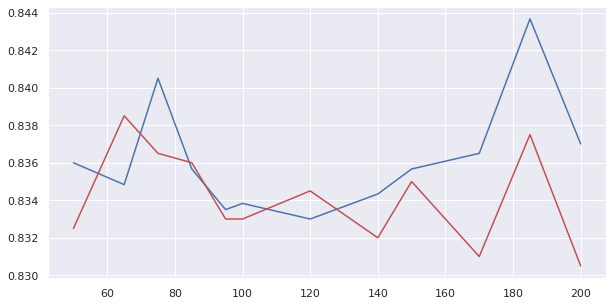

In [231]:
best_sgdc=SGDClassifier(penalty='l1',eta0=100,alpha=0.0001)
bc=BaggingClassifier(best_sgdc)

n_estimators=[50,65,75,85,95,100,120,140,150,170,185,200]
cv=StratifiedKFold(4)

train_score,val_score=validation_curve(bc,best_x,y2,param_name='n_estimators',param_range=n_estimators,cv=cv)

plt.figure(figsize=(10,5))
plt.plot(n_estimators,train_score.mean(axis=1))
plt.plot(n_estimators,val_score.mean(axis=1),c='r')

In [243]:
best_sgdc=SGDClassifier(penalty='l1',eta0=100,alpha=0.0001)
bc=BaggingClassifier(best_sgdc,n_estimators=185)
cross_val_score(bc,best_x,y2,cv=cv).mean()

0.832

## 3.Bagging with KNeighborsClassifier


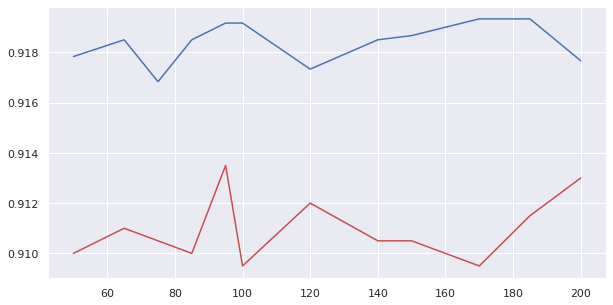

In [244]:
best_knn=KNeighborsClassifier(n_neighbors=33)
bc=BaggingClassifier(best_knn)

n_estimators=[50,65,75,85,95,100,120,140,150,170,185,200]
cv=StratifiedKFold(4)

train_score,val_score=validation_curve(bc,best_x,y2,param_name='n_estimators',param_range=n_estimators,cv=cv)

plt.figure(figsize=(10,5))
plt.plot(n_estimators,train_score.mean(axis=1))
plt.plot(n_estimators,val_score.mean(axis=1),c='r')

In [253]:
best_knn=KNeighborsClassifier(n_neighbors=33)
bc=BaggingClassifier(best_knn,n_estimators=85)
cross_val_score(bc,best_x,y2,cv=cv).mean()

0.913

## 4.Bagging with SVC:

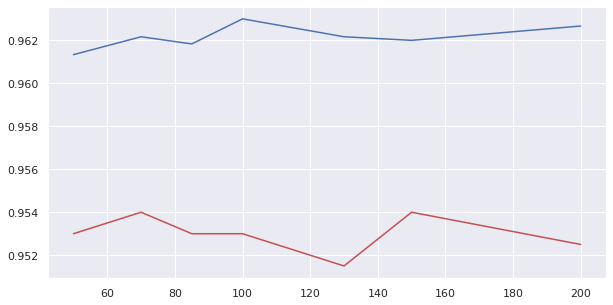

In [245]:
best_SVC=SVC(C=10, gamma=1)
bc=BaggingClassifier(best_knn)

n_estimators=[50,70,85,100,130,150,200]
cv=StratifiedKFold(4)

train_score,val_score=validation_curve(bc,best_x,y2,param_name='n_estimators',param_range=n_estimators,cv=cv)

plt.figure(figsize=(10,5))
plt.plot(n_estimators,train_score.mean(axis=1))
plt.plot(n_estimators,val_score.mean(axis=1),c='r')

In [255]:
best_SVC=SVC(C=10, gamma=1)
bc=BaggingClassifier(best_SVC,n_estimators=85)
cross_val_score(bc,best_x,y2,cv=cv).mean()

0.95

## 5.Bagging with RandomForestClassifier:

In [257]:
best_rfc=RandomForestClassifier(n_estimators=200,max_depth= 70)
bc=BaggingClassifier(best_rfc,n_estimators=85)
cross_val_score(bc,best_x,y2,cv=cv).mean()

0.918

In [258]:
bagging_val_results=[0.91,0.91,0.832,0.95,0.91]

## 6.Resume with plots: 

Text(0.5, 1.0, 'First , SelectKBest ,SFM , HpTuning and Bagging validation results')

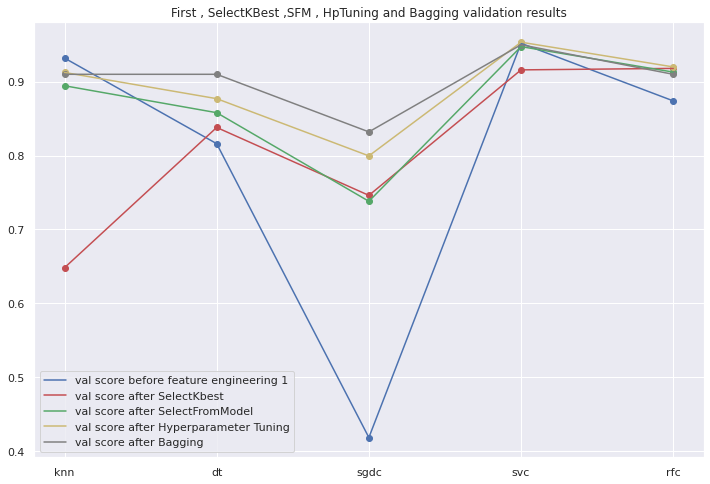

In [276]:
plt.figure(figsize=(12,8))
plt.scatter(x=models.keys(),y=val_results,c='b',)
plt.plot(val_results,c='b',label='val score before feature engineering 1')


plt.scatter(x=models.keys(),y=val_results2,c='r')
plt.plot(val_results2,c='r',label='val score after SelectKbest')


plt.scatter(x=models.keys(),y=val_results_sfm,c='g')
plt.plot(val_results_sfm,c='g',label='val score after SelectFromModel')



plt.scatter(x=models.keys(),y=rscv_val_scores,c='y')
plt.plot(rscv_val_scores,c='y',label='val score after Hyperparameter Tuning')


plt.scatter(x=models.keys(),y=bagging_val_results,c='grey')
plt.plot(bagging_val_results,c='grey',label='val score after Bagging')

plt.legend()
plt.title('First , SelectKBest ,SFM , HpTuning and Bagging validation results')

#### Observation:
##### -We have no improvement with knn,svc and RandomForestClassifier.
#####  -DecisionTree Model and SGDClassifier still increasing.

# IX.Stacking 

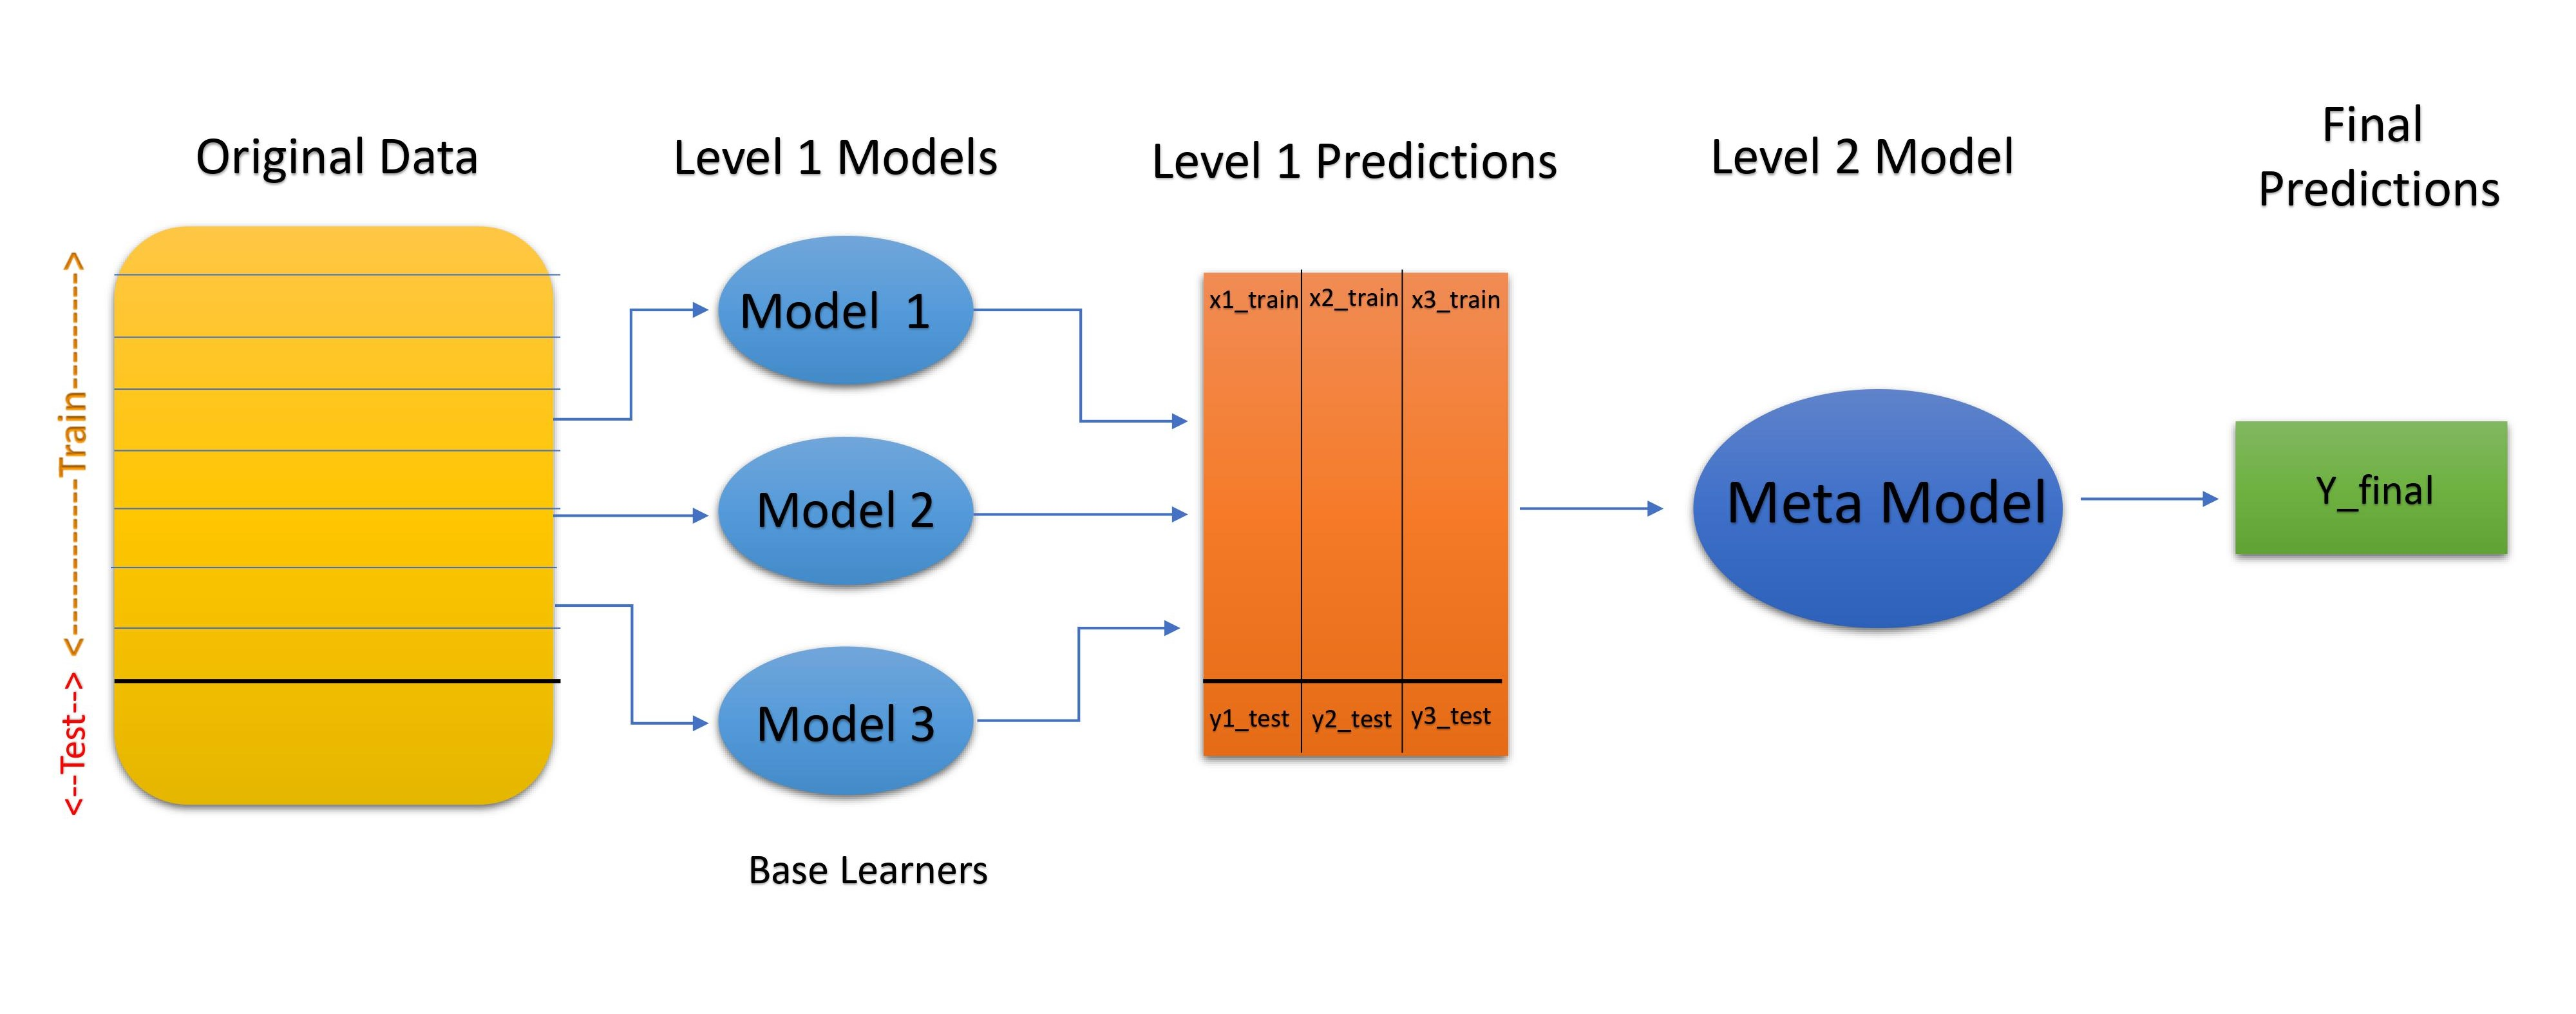

In [301]:
from sklearn.ensemble import StackingClassifier

In [329]:
best_knn=KNeighborsClassifier(n_neighbors=33)

best_dc=DecisionTreeClassifier(min_samples_leaf=3,max_depth=None,criterion='entropy')
bagg_dc=BaggingClassifier(best_dc,n_estimators=85)

best_sgdc=SGDClassifier(penalty='l1',eta0=100,alpha=0.0001)
bagg_sgdc=BaggingClassifier(best_sgdc,n_estimators=85)

best_svc=SVC(C=10, gamma=1,probability=True)
best_rfc=RandomForestClassifier(n_estimators=200,max_depth= 70)

level1=[('best_knn',best_knn),
        ('bagg_dc',bagg_dc),
        ('bagg_sgdc',bagg_sgdc),
        ('best_rfc',best_rfc),
        ('best_svc',best_svc)
        ]
final=RandomForestClassifier()

stack=StackingClassifier(estimators=level1,final_estimator=final,verbose=2)

In [305]:
cross_val_score(stack,best_x,y2,cv=cv).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

0.952

# X.Voting :

In [334]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix,f1_score

In [319]:
best_x_train,best_x_val,y2_train,y2_val=train_test_split(best_x,y2,test_size=0.25,random_state=42)

In [330]:
vot_estimators={('best_knn',best_knn),
        ('bagg_dc',bagg_dc),
        ('bagg_sgdc',bagg_sgdc),
        ('best_rfc',best_rfc),
        ('best_svc',best_svc)
}

In [331]:
VC=VotingClassifier(estimators=vot_estimators,voting='soft')
VC.fit(best_x_train,y2_train)

VotingClassifier(estimators={('bagg_dc',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                      min_samples_leaf=3),
                                                n_estimators=85)),
                             ('bagg_sgdc',
                              BaggingClassifier(base_estimator=SGDClassifier(eta0=100,
                                                                             penalty='l1'),
                                                n_estimators=85)),
                             ('best_knn', KNeighborsClassifier(n_neighbors=33)),
                             ('best_rfc',
                              RandomForestClassifier(max_depth=70,
                                                     n_estimators=200)),
                             ('best_svc',
                              SVC(C=10, gamma=1, probability=True))},
              

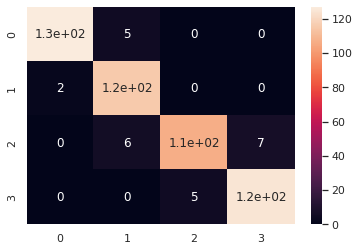

In [332]:
y_pred=VC.predict(best_x_val)
cm=confusion_matrix(y_val,y_pred)
sns.heatmap(cm,annot=True)

In [342]:
print(classification_report(y2_val,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       132
           1       0.91      0.98      0.95       118
           2       0.96      0.89      0.92       120
           3       0.95      0.96      0.95       130

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



In [333]:
VC=VotingClassifier(estimators=vot_estimators,voting='soft')
cross_val_score(VC,best_x,y2,cv=cv).mean()

0.942

# Artificial Neural Network

In [343]:
from keras.layers import Dense
from keras.models import Sequential

In [350]:
ann=Sequential([
    Dense(32,activation='relu',input_shape=(4,)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(4,activation='softmax')
])

In [351]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [372]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                160       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,484
Trainable params: 4,484
Non-trainable params: 0
_________________________________________________________________


In [352]:
from sklearn.model_selection import train_test_split

In [353]:
x_train,x_val,y_train,y_val=train_test_split(best_x,y2,test_size=0.25,random_state=42)

In [354]:
x_train.shape

(1500, 4)

In [349]:
x_train.head()

,battery_power,px_height,px_width,ram
1738,0.006680,0.191146,0.510013,0.567076
548,0.093520,0.217188,0.172897,0.892304
936,0.203073,0.657292,0.692924,0.906200
1389,0.868403,0.052083,0.806409,0.000534
1607,0.162325,0.652083,0.976636,0.653127


In [355]:
ann.fit(x_train.values,y_train,validation_split=0.2,batch_size=10,epochs=400)

Epoch 1/400
120/120 [==============================] - 1s 4ms/step - loss: 1.2333 - accuracy: 0.4533 - val_loss: 0.9666 - val_accuracy: 0.5967
Epoch 2/400
120/120 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.7308 - val_loss: 0.5061 - val_accuracy: 0.8367
Epoch 3/400
120/120 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8900 - val_loss: 0.3105 - val_accuracy: 0.9233
Epoch 4/400
120/120 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.9117 - val_loss: 0.2293 - val_accuracy: 0.9433
Epoch 5/400
120/120 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.9258 - val_loss: 0.1967 - val_accuracy: 0.9333
Epoch 6/400
120/120 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9358 - val_loss: 0.1712 - val_accuracy: 0.9400
Epoch 7/400
120/120 [==============================] - 0s 2ms/step - loss: 0.1925 - accuracy: 0.9258 - val_loss: 0.1652 - val_accuracy: 0.9367

In [356]:
y_pred=[np.argmax(i) for i in ann.predict(x_val)]

In [357]:
cm=confusion_matrix(y_val,y_pred)

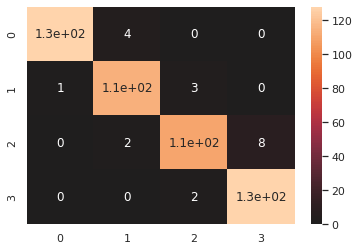

In [358]:
sns.heatmap(cm,annot=True,center=0)

In [361]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       132
           1       0.95      0.97      0.96       118
           2       0.96      0.92      0.94       120
           3       0.94      0.98      0.96       130

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [365]:
f1_score(y_val,y_pred,average='micro')

0.96